<a href="https://colab.research.google.com/github/prajapatipiyush1209/Implementation-of-ML-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**



Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

DATA Source: https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees?resource=download

# Decision Tree Classifier

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
df = pd.read_csv('drug200.csv')

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.shape

(200, 6)

# Feature Engineering

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df['Sex'] = df['Sex'].map({'F': '0','M':'1'})

In [ ]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
df['BP'] =df['BP'].map({'LOW':'1', 'NORMAL':'2','HIGH':'3'})

In [ ]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df['Cholesterol'] =df['Cholesterol'].map({'NORMAL':'1','HIGH':'2'})

In [ ]:
df.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df['Drug'] =df['Drug'].map({'drugY':'1', 'drugC':'2', 'drugX':'3', 'drugA':'4', 'drugB':'5'})

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,3,2,25.355,1
1,47,1,1,2,13.093,2
2,47,1,1,2,10.114,2
3,28,0,2,2,7.798,3
4,61,0,1,2,18.043,1


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

**Now Implement a Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3,random_state= 42)

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(y_predict,y_test)

1.0

In [ ]:
print(confusion_matrix(y_predict,y_test))
#Here model is perfect fit with the predicted data so that reason our accuracy is to high this case is overfitting

[[26  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  3]]


In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         3

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# Post Prunning

In the post prunnig, apply after is trained and check which is maximum depth of tree that reduced or overcome condition of the **overfitting**.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3,random_state= 42)


[Text(0.6666666666666666, 0.9, 'x[4] <= 14.829\ngini = 0.692\nsamples = 140\nvalue = [65, 10, 36, 16, 13]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 2.5\ngini = 0.676\nsamples = 75\nvalue = [0, 10, 36, 16, 13]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 1.5\ngini = 0.34\nsamples = 46\nvalue = [0, 10, 36, 0, 0]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 1.5\ngini = 0.499\nsamples = 21\nvalue = [0, 10, 11, 0, 0]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25, 0, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\ngini = 0.495\nsamples = 29\nvalue = [0, 0, 0, 16, 13]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 13]'),
 Text(0.7777777777777778, 0.7, 'gini = 0.0\nsamples

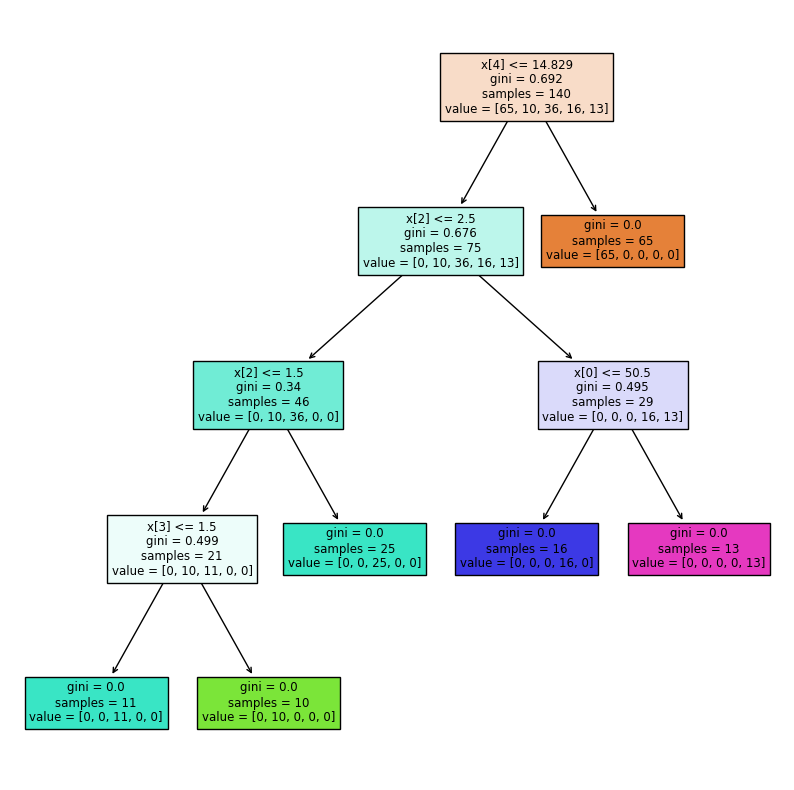

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
tree.plot_tree(model,filled= True)

# In this example clearly see that condition of the Overfitting is occurs in the
# data is reached to the leaf node that very significant with trainning data.
# So, we need to prunning the depth of the tree and after that calculate the
# accuracy of the data

In [ ]:
model1 = DecisionTreeClassifier(max_depth = 2)
model1.fit(X_train,y_train)

y_predict = model1.predict(X_test)

accuracy_score(y_predict,y_test)

# Here in the output clearly see that before the prunning model accuracy is 100% but after the prunning model accuracy is 97%
# this reduce model overfitting condition.

0.85

In [ ]:
print(confusion_matrix(y_predict,y_test))

[[26  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  6 18  0  0]
 [ 0  0  0  7  3]
 [ 0  0  0  0  0]]


In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       0.00      0.00      0.00         0
           3       1.00      0.75      0.86        24
           4       1.00      0.70      0.82        10
           5       0.00      0.00      0.00         0

    accuracy                           0.85        60
   macro avg       0.60      0.49      0.54        60
weighted avg       1.00      0.85      0.91        60



[Text(0.6, 0.8333333333333334, 'x[4] <= 14.829\ngini = 0.692\nsamples = 140\nvalue = [65, 10, 36, 16, 13]'),
 Text(0.4, 0.5, 'x[2] <= 2.5\ngini = 0.676\nsamples = 75\nvalue = [0, 10, 36, 16, 13]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.34\nsamples = 46\nvalue = [0, 10, 36, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.495\nsamples = 29\nvalue = [0, 0, 0, 16, 13]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 65\nvalue = [65, 0, 0, 0, 0]')]

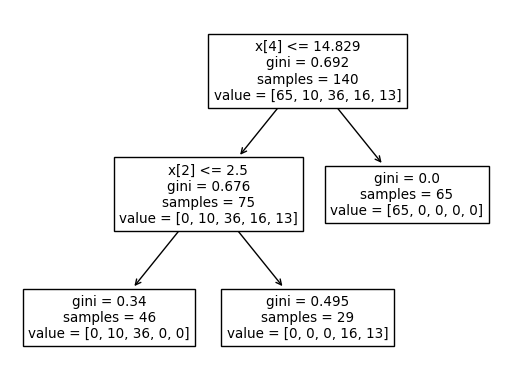

In [ ]:
tree.plot_tree(model1)

# Pre Prunning

In the pre prunning we do a hyperparameter tuning.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3,random_state= 42)
model2 = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 5,
 max_features= 'auto',
 splitter='best')

In [ ]:
X_train.shape

(140, 5)

In [ ]:
X_test.shape

(60, 5)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter  = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

gridcv = GridSearchCV(estimator = model2,param_grid = parameter,cv = 5)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

gridcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [ ]:
y_predict = gridcv.predict(X_test)

In [ ]:
accuracy_score(y_predict,y_test)

0.8833333333333333

In [ ]:
print(confusion_matrix(y_predict,y_test))

[[26  0  0  0  0]
 [ 0  5  6  0  0]
 [ 0  1 12  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  3]]


In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       0.83      0.45      0.59        11
           3       0.67      0.92      0.77        13
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         3

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.87        60
weighted avg       0.90      0.88      0.88        60



In [ ]:
gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}